In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

We will be using a dataset containing measurements for diagnosis of inflamatory diseases in the urinary system. [Read the info here](https://archive.ics.uci.edu/ml/datasets/Acute+Inflammations)
Load `acute.data` (tab-delimited file) into a pandas DataFrame, using the following column names:

'Temperature', 'nausea', 'Lumbar pain', 'Urine pushing', 'Micturition pains', 'Burning', 'UBI', 'Neph'

In [2]:
features = ['Temperature', 'nausea', 'Lumbar pain', 'Urine pushing', 'Micturition pains', 'Burning', 'UBI', 'Neph']

In [3]:
df = pd.read_csv('acute.data', sep='\t', names=features)

In [4]:
df.head()

,Temperature,nausea,Lumbar pain,Urine pushing,Micturition pains,Burning,UBI,Neph
0,"3 5 , 5",n o,y e s,n o,n o,n o,n o,n o
1,"3 5 , 9",n o,n o,y e s,y e s,y e s,y e s,n o
2,"3 5 , 9",n o,y e s,n o,n o,n o,n o,n o
3,"3 6 , 0",n o,n o,y e s,y e s,y e s,y e s,n o
4,"3 6 , 0",n o,y e s,n o,n o,n o,n o,n o


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
Temperature          120 non-null object
nausea               120 non-null object
Lumbar pain          120 non-null object
Urine pushing        120 non-null object
Micturition pains    120 non-null object
Burning              120 non-null object
UBI                  120 non-null object
Neph                 120 non-null object
dtypes: object(8)
memory usage: 7.6+ KB


The data needs some cleaning before we can actually do something with it.

- First, fix the Temperature column by removing the spaces, replacing the comma (,) with a period (.) and changing the data type from string to float.
- Next, replace all the ' y e s ' values with 1 and the ' n o ' values with 0

In [6]:
# take a look at a sample value:
test = df.Temperature[0]
print(test, type(test))

# remove the spaces
test = test.replace(' ', '')
print(test, type(test))

# replace the comma with a point
test = test.replace(',', '.')
print(test, type(test))

# change type from string to float
test = float(test)
print(test, type(test))

# in one step:
test = float(df.Temperature[0].replace(' ', '').replace(',', '.'))
print(test, type(test))

3 5 , 5  <class 'str'>
35,5 <class 'str'>
35.5 <class 'str'>
35.5 <class 'float'>
35.5 <class 'float'>


In [7]:
clean = df.drop('Temperature', axis=1).replace({' n o ' : 0, ' y e s ' : 1})
clean['Temperature'] = df['Temperature'].map(lambda x:float(x.replace(' ', '').replace(',', '.')))
clean['Temperature'] = clean['Temperature'].transform(lambda x:(x-x.min())/x.ptp())

In [8]:
clean.head()

,nausea,Lumbar pain,Urine pushing,Micturition pains,Burning,UBI,Neph,Temperature
0,0,1,0,0,0,0,0,0.000000
1,0,0,1,1,1,1,0,0.066667
2,0,1,0,0,0,0,0,0.066667
3,0,0,1,1,1,1,0,0.083333
4,0,1,0,0,0,0,0,0.083333


Next, we would like to do some unsupervised clustering of the features and compare it to the labels. 

Split the data to X and y as follows:
- X should contain all the features (exclude UBI and Neph columns)
- y should be a new list, where each value equals 'UBI', 'Neph', 'Both', or 'Neither' according to the values in the UBI and Neph columns

In [9]:
X = clean.drop(['UBI', 'Neph'], axis=1)
y_UBI = clean['UBI']
y_Neph = clean['Neph']

diagnoses = []
for UBI, Neph in zip(y_UBI, y_Neph):
    if (UBI and Neph):
        diagnosis = 'Both'
    elif UBI:
        diagnosis = 'UBI'
    elif Neph:
        diagnosis = 'Neph'
    else:
        diagnosis = 'Neither'
    diagnoses.append(diagnosis)

In [10]:
diagnoses

['Neither',
 'UBI',
 'Neither',
 'UBI',
 'Neither',
 'Neither',
 'UBI',
 'Neither',
 'UBI',
 'UBI',
 'UBI',
 'Neither',
 'Neither',
 'UBI',
 'Neither',
 'Neither',
 'UBI',
 'UBI',
 'UBI',
 'Neither',
 'UBI',
 'UBI',
 'Neither',
 'UBI',
 'UBI',
 'UBI',
 'UBI',
 'UBI',
 'Neither',
 'UBI',
 'UBI',
 'UBI',
 'Neither',
 'UBI',
 'Neither',
 'UBI',
 'UBI',
 'Neither',
 'UBI',
 'UBI',
 'Neither',
 'Neither',
 'UBI',
 'UBI',
 'UBI',
 'UBI',
 'UBI',
 'UBI',
 'UBI',
 'UBI',
 'Neither',
 'UBI',
 'Neither',
 'UBI',
 'UBI',
 'UBI',
 'UBI',
 'Neither',
 'UBI',
 'UBI',
 'Neph',
 'Neph',
 'Neph',
 'Neph',
 'Neph',
 'Neph',
 'Neph',
 'Neph',
 'Neph',
 'Neph',
 'Both',
 'Both',
 'Both',
 'Neither',
 'Neither',
 'Neph',
 'Neph',
 'Neph',
 'Both',
 'Both',
 'Neither',
 'Neph',
 'Neph',
 'Both',
 'Both',
 'Both',
 'Neither',
 'Neph',
 'Both',
 'Both',
 'Neither',
 'Neph',
 'Both',
 'Both',
 'Neither',
 'Neph',
 'Neph',
 'Neph',
 'Both',
 'Both',
 'Neph',
 'Both',
 'Neither',
 'Neph',
 'Neph',
 'Both',
 'Bot

- Visualize the value counts for each diagnosis using a pie chart.

In [11]:
pd.Series(diagnoses).value_counts()

UBI        40
Neph       31
Neither    30
Both       19
dtype: int64

Text(0,0.5,'')

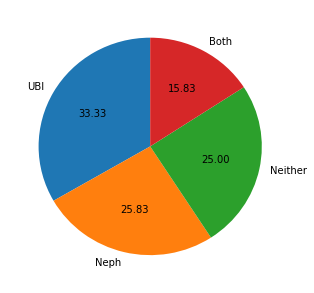

In [15]:
fig = plt.figure(figsize=[5, 5])
pd.Series(diagnoses).value_counts().plot.pie(autopct='%.2f', startangle = 90)
plt.ylabel('')

In [16]:
clean['diagnosis'] = pd.Series(diagnoses)

clean.head()

,nausea,Lumbar pain,Urine pushing,Micturition pains,Burning,UBI,Neph,Temperature,diagnosis
0,0,1,0,0,0,0,0,0.000000,Neither
1,0,0,1,1,1,1,0,0.066667,UBI
2,0,1,0,0,0,0,0,0.066667,Neither
3,0,0,1,1,1,1,0,0.083333,UBI
4,0,1,0,0,0,0,0,0.083333,Neither


In [17]:
X.head()

,nausea,Lumbar pain,Urine pushing,Micturition pains,Burning,Temperature
0,0,1,0,0,0,0.000000
1,0,0,1,1,1,0.066667
2,0,1,0,0,0,0.066667
3,0,0,1,1,1,0.083333
4,0,1,0,0,0,0.083333


- Use the KMeans estimator from the scikit-learn cluster module to find 4 clusters in the data using all the features in X.
- Can you figure out which cluster is which?
- Are value counts enough to make a determination?

In [18]:
from sklearn.cluster import KMeans

In [19]:
clf = KMeans(n_clusters = 4, random_state=987)
diag_pred = clf.fit_predict(X)

In [20]:
clean.diagnosis.value_counts()

UBI        40
Neph       31
Neither    30
Both       19
Name: diagnosis, dtype: int64

In [21]:
diag_pred

array([2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1,
       2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 0, 0, 0, 2, 2, 0, 0, 3, 0, 0, 2, 0, 3, 0, 0, 0, 2, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 3, 3, 0, 0, 3, 0, 2, 0, 3, 0, 0, 2, 0, 3,
       0, 2, 0, 3, 0, 3, 2, 0, 3, 3])

In [22]:
np.bincount(diag_pred)

array([29, 40, 30, 21], dtype=int64)

To find out, let's perform dimensionality reduction:
- use the sklearn PCA estimator to fit and transform X onto 2 dimensions.
- Visualize the transformed data as a scatter plot (tip: create a new pandas dataframe with the transformed data, and add a column with the diagnosis. Then use seaborn's pointplot function to visualize. Set join=False to avoid connecting the dots)
- Visualize the same but using the predicted clusters as the label. 
- Can you figure out with label matches which cluster now? Try using the sklearn confusion_matrix to verify your conclusion. **Bonus**: use imshow to visualize the confusion matrix.

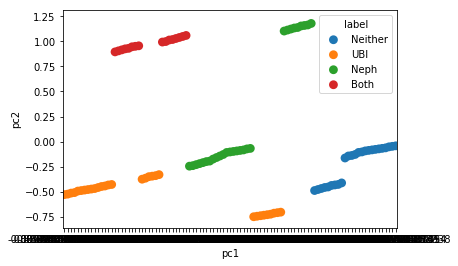

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=123)
X_pca = pca.fit_transform(X)
X_pca_df = pd.DataFrame(X_pca, columns = ['pc1', 'pc2'])
X_pca_df['label'] = clean['diagnosis']
X_pca_df['pred_class'] = diag_pred

plt.figure()
sns.pointplot(data=X_pca_df, x='pc1', y='pc2', hue='label', join=False)
plt.figure()
sns.pointplot(data=X_pca_df, x='pc1', y='pc2', hue='pred_class', join=False)

In [ ]:
X_pca_df

In [ ]:
mapping = {'UBI':0, 'Neither':1, 'Both':2,  'Neph':3}
diag_map = clean.diagnosis.map(mapping)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(diag_map, diag_pred)
cm_norm = cm/np.sum(cm, axis=1)
groups = ['UBI', 'Neither', 'Both', 'Neph']
plt.imshow(cm, cmap='Greys_r')
plt.xticks([0,1,2,3], groups)
plt.yticks([0,1,2,3], groups)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Use the `pca_results` function defined below to visualize the PCA. Do you understand the result?

In [ ]:
def pca_results(df, pca):
    '''
    Create a DataFrame of the PCA results
    Includes dimension feature weights and explained variance
    Visualizes the PCA results
    '''

    # Dimension indexing
    dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = df.keys())
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (14,8))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar');
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)


    # Display the explained variance ratios
    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)


In [ ]:
pca_results(X, pca)

Supervised classification:
- Use the KneighborsClassifier estimator from sklearn to fit a model to the data:
    - Perform train-test-split
    - Initiate a classifier instance and fit it on the training data & labels (You can train with both labels at once with `y = data[['UBI', 'Neph']]` as the label) 
    - Check the model performance using the score method. What does that score mean?
    - Verify the validity of your score with a cross validation score on a stratified 5 fold crossvalidation set.

In [ ]:
y = clean[['UBI', 'Neph']]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

clf = KNeighborsClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
cv = StratifiedKFold(n_splits=5)
cross_val_score(clf, X, clean['diagnosis'], cv=cv)